# MD004 ENTREGA 7 ENTROPÍA


Se dispone del siguiente dataset que contiene características de dos tipos de calabazas. El objetivo será elaborar un modelo de regresión logística que nos permita realizar una predicción sobre si la calabaza es del tipo Urgup_Sivrisi (0) o del tipo Cercevelik (1)

- Area: área de la calabaza
- Perimeter: perímetro de la calabaza
- Major_Axis_Length: Longitud del eje más largo de la calabaza
- Minor_Axis_Length: Longitud del eje más corto de la calabaza
- Convex_Area: Área convexa de la calabaza
- Equiv_Diameter: Diámetro equivalente
- Eccentricity: Excentricidad de la calabaza
- Solidity: Solidez de la calabaza
- Extent: Alcance de la calabaza
- Roundness: Redondez de la calabaza
- Aspect_Ration: Relación de aspecto de la calabaza
- Compactness: Compactibilidad de la calabaza
- Class: Clase de la calabaza


###### Data:
20240123_Semillas_calabaza.csv'

###### Se pide:

1. Visualización, limpieza y comprensión del dataset (1p): realizar un estudio previo al tratamiento de los datos para comprender mejor la información de la que se dispone
2. Elección de variables:
- Análisis de la información mutua (2p)
- Estudio de la correlación entre las variables (1p)
- Estudio de las componentes principales: no olvidéis las visualizaciones en este apartado (2p)
3. Desarrollo de un modelo de Regresión logística (3p): justificad la elección de variables finales y valoración del modelo en función de la matriz de confusión

Nota: realizad un cambio en la variable clase para establecer como 0 el tipo de calabaza Urgup_Sivrisi y como 1 para el tipo Cercevelik
;) Recuerda realizar un apartado de conclusiones que recoja las principales observaciones a lo largo del ejercicio

<br>
<div>
<img src="attachment:image-6.png" width="500"/>
</div>



## <font color='#3d59c6'>  0. CARGA DE PACKAGES </font>

- **tidyverse:** esta librería nos será útil en todo el proceso del análisis descriptivo así como también, a la hora de manipular los datos. Engloba varias librerías como por ejemplo ggplot2 y dplyr (usados en la sesión anterior)
- **FSelectorRcpp:** implementación 'Rcpp' (Weka) de los algoritmos de selección de características basados ​​en entropía 'FSelector' con soporte de matriz dispersa
- **caret:** Nos ayudará a la hora de evaluar un modelo de aprendizaje automático, sobretodo en el proceso de ajuste de hiperparámetros cuando busquemos optimizarlo. Además, contiene funciones para realizar validación cruzada
- **ggplot2**: la usamos para crear gráficos más personalizables o dicho de otra manera, podremos crear visualizaciones complejas.
- **GGally**: es una extensión de ggplot2 con funciones adicionales para crear matrices de gráficos, lo que facilita la exploración de relaciones entre múltiples variables
- **gridExtra:** con esta librería podremos organizar y personalizar nuestros gráficos, así como mapear varios gráficos en una única área

In [1]:
install.packages("FSelectorRcpp") #5min



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘foreach’, ‘iterators’, ‘BH’, ‘RcppArmadillo’




In [2]:
  install.packages("caret") #6min

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [3]:
install.packages("gridExtra", repos = "http://cran.rstudio.com/")
install.packages("corrplot")
install.packages("GGally")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘ggstats’




In [4]:
library(tidyverse)
library(FSelectorRcpp)
library(caret)
library(ggplot2)
library(GGally)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## <font color='#3d59c6'>  1. CARGA DE DATOS </font>

In [5]:
data = read.csv(file='20240123_Semillas_calabaza.csv', header=TRUE, sep=',', dec='.')

In [6]:
data <- subset(data, select = -X)

In [7]:

str(data)

'data.frame':	2500 obs. of  13 variables:
 $ Area             : int  56276 76631 71623 66458 66107 73191 73338 69692 95727 73465 ...
 $ Perimeter        : num  888 1068 1083 992 998 ...
 $ Major_Axis_Length: num  326 417 436 382 384 ...
 $ Minor_Axis_Length: num  220 234 211 223 220 ...
 $ Convex_Area      : int  56831 77280 72663 67118 67117 73969 73859 70442 96831 74089 ...
 $ Equiv_Diameter   : num  268 312 302 291 290 ...
 $ Eccentricity     : num  0.738 0.828 0.875 0.812 0.819 ...
 $ Solidity         : num  0.99 0.992 0.986 0.99 0.985 ...
 $ Extent           : num  0.745 0.715 0.74 0.74 0.675 ...
 $ Roundness        : num  0.896 0.844 0.767 0.849 0.834 ...
 $ Aspect_Ration    : num  1.48 1.78 2.07 1.71 1.74 ...
 $ Compactness      : num  0.821 0.749 0.693 0.762 0.756 ...
 $ Class            : chr  "Çerçevelik" "Çerçevelik" "Çerçevelik" "Çerçevelik" ...



## <font color='#3d59c6'>  2. ANÁLISIS DESCRIPTIVO </font>


In [8]:
data_num = data %>%
  select_if(is.numeric)

In [9]:
summary(data_num)

      Area          Perimeter      Major_Axis_Length Minor_Axis_Length
 Min.   : 47939   Min.   : 868.5   Min.   :320.8     Min.   :152.2    
 1st Qu.: 70765   1st Qu.:1048.8   1st Qu.:415.0     1st Qu.:211.2    
 Median : 79076   Median :1123.7   Median :449.5     Median :224.7    
 Mean   : 80658   Mean   :1130.3   Mean   :456.6     Mean   :225.8    
 3rd Qu.: 89758   3rd Qu.:1203.3   3rd Qu.:492.7     3rd Qu.:240.7    
 Max.   :136574   Max.   :1559.5   Max.   :661.9     Max.   :305.8    
  Convex_Area     Equiv_Diameter   Eccentricity       Solidity     
 Min.   : 48366   Min.   :247.1   Min.   :0.4921   Min.   :0.9186  
 1st Qu.: 71512   1st Qu.:300.2   1st Qu.:0.8317   1st Qu.:0.9883  
 Median : 79872   Median :317.3   Median :0.8637   Median :0.9903  
 Mean   : 81508   Mean   :319.3   Mean   :0.8609   Mean   :0.9895  
 3rd Qu.: 90798   3rd Qu.:338.1   3rd Qu.:0.8970   3rd Qu.:0.9915  
 Max.   :138384   Max.   :417.0   Max.   :0.9481   Max.   :0.9944  
     Extent         Roundne

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


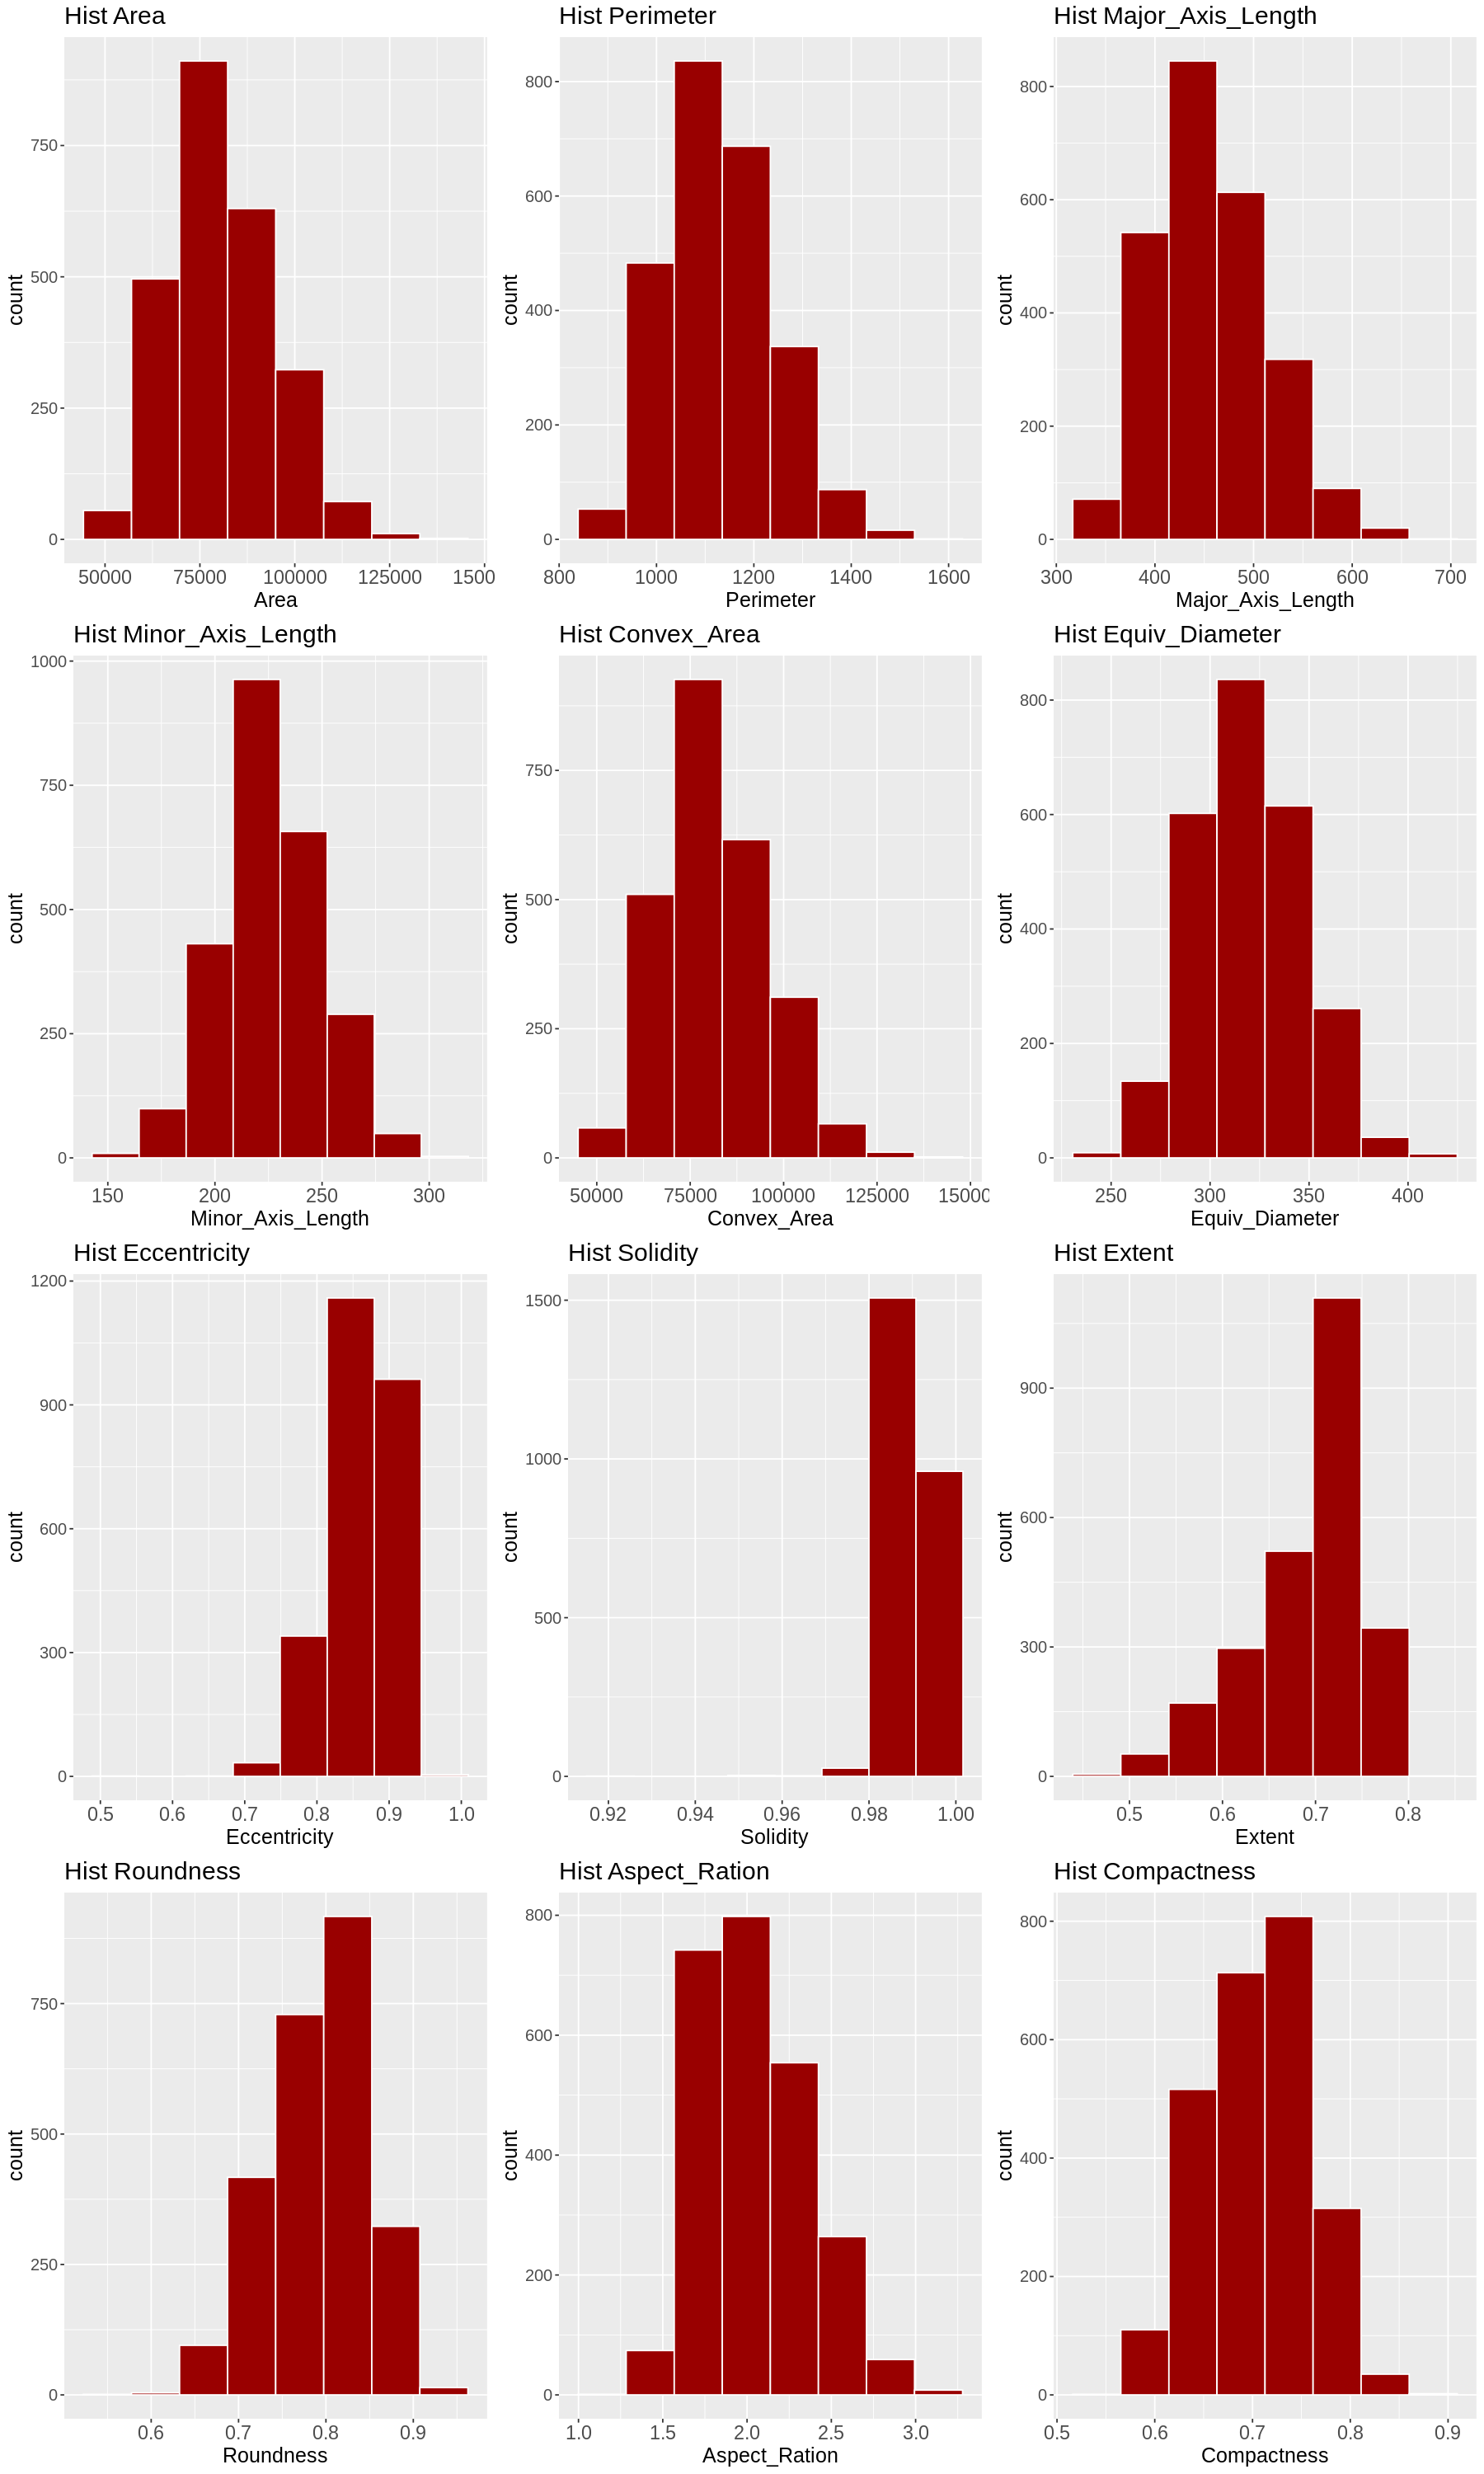

In [10]:
graficos_hist = list()
var_data = colnames(data_num)

for (variable in var_data) {

  grafico = ggplot(data_num) +
    aes_string(x = variable) +
    geom_histogram(bins = 8, fill = '#990000', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) +
    labs(title = paste('Hist', variable))


  graficos_hist[[length(graficos_hist) + 1]] = grafico
}

options(
  repr.plot.width = 15,
  repr.plot.height = 25
)

# Mostrar los histogramas en un grid
grid.arrange(grobs = graficos_hist, ncol = 3, widths = rep(2, 3))

El histograma y los estadisticos descriptivos muestran que en general todas las variables tienen una distribución gaussiana. Donde la media y la mediana tienen valores similares. A observar 2 variables (Solidity, Eccentricity), donde los datos tienden a acumularse en los ultimos quartiles.

In [11]:
unique_values <- unique(data$Class)
print(unique_values)

[1] "Çerçevelik"    "Ürgüp Sivrisi"


In [12]:

data_class <- data



# Si la codificación no es "UTF-8", intenta convertirla a UTF-8
data_class$Class <- iconv(data_class$Class, to = "UTF-8")

# Reemplazar el texto en la columna 'Class' con valores 0 y 1
data_class$Class <- ifelse(data_class$Class == "Çerçevelik", 1, 0)




Para nuestro análisis la clasificación "Cercevelik" es identificada como Class [1] y "Urgup_Sivrisi" como Class [0]



In [13]:
#Generamos datasets filtrando por la clase
data_num_1 = data_num[data_num$Class == 1,]
data_num_0 = data_num[data_num$Class == 0,]

In [14]:
unique_values <- unique(data_class$Class)
print(unique_values)

[1] 1 0


In [15]:
# Calcula el número de instancias para cada clase
num_class_0 <- sum(data_class$Class == 0)
num_class_1 <- sum(data_class$Class == 1)

# Imprime el número de instancias para cada clase
cat("Número de instancias para la clase 0:", num_class_0, "\n")
cat("Número de instancias para la clase 1:", num_class_1, "\n")

# Calcula la proporción de instancias para cada clase
prop_class_0 <- num_class_0 / nrow(data_class) * 100
prop_class_1 <- num_class_1 / nrow(data_class) * 100

# Imprime la proporción de instancias para cada clase
cat("Proporción de instancias para la clase 0:", prop_class_0, "%\n")
cat("Proporción de instancias para la clase 1:", prop_class_1, "%\n")


Número de instancias para la clase 0: 1200 
Número de instancias para la clase 1: 1300 
Proporción de instancias para la clase 0: 48 %
Proporción de instancias para la clase 1: 52 %


Se observa que el dataset tiene los datos de las clasificaciones relativamente balanceadas.

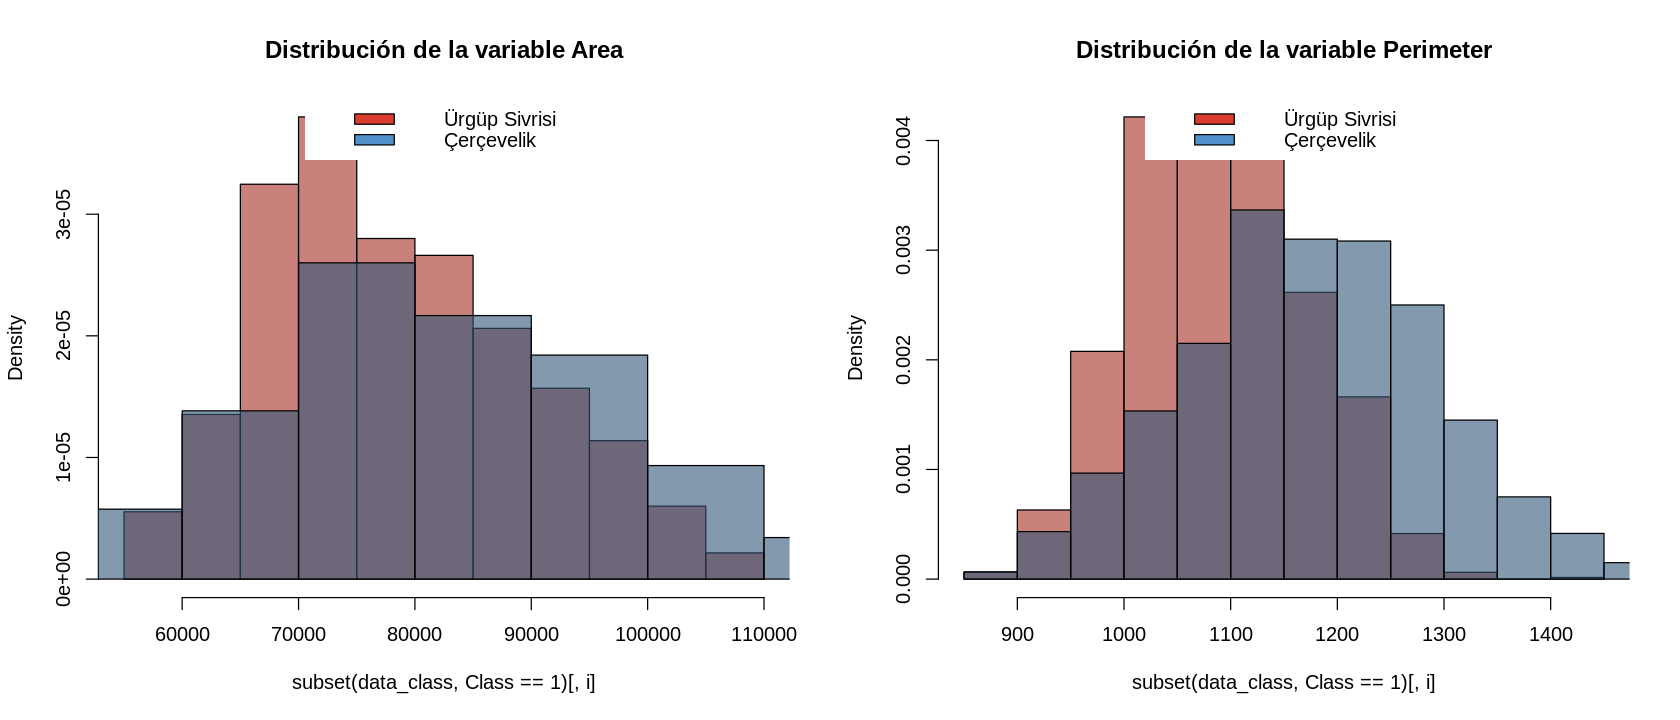

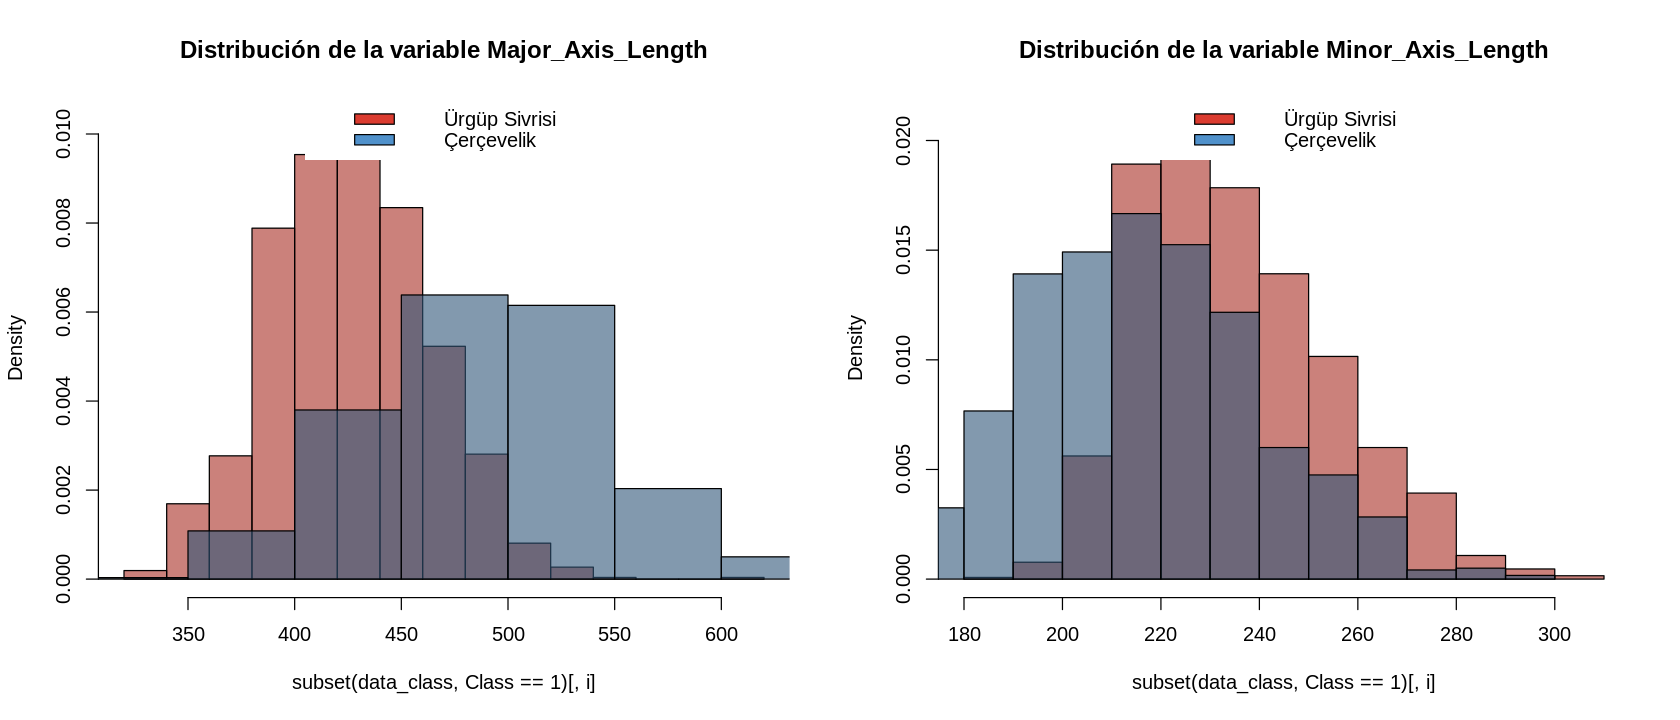

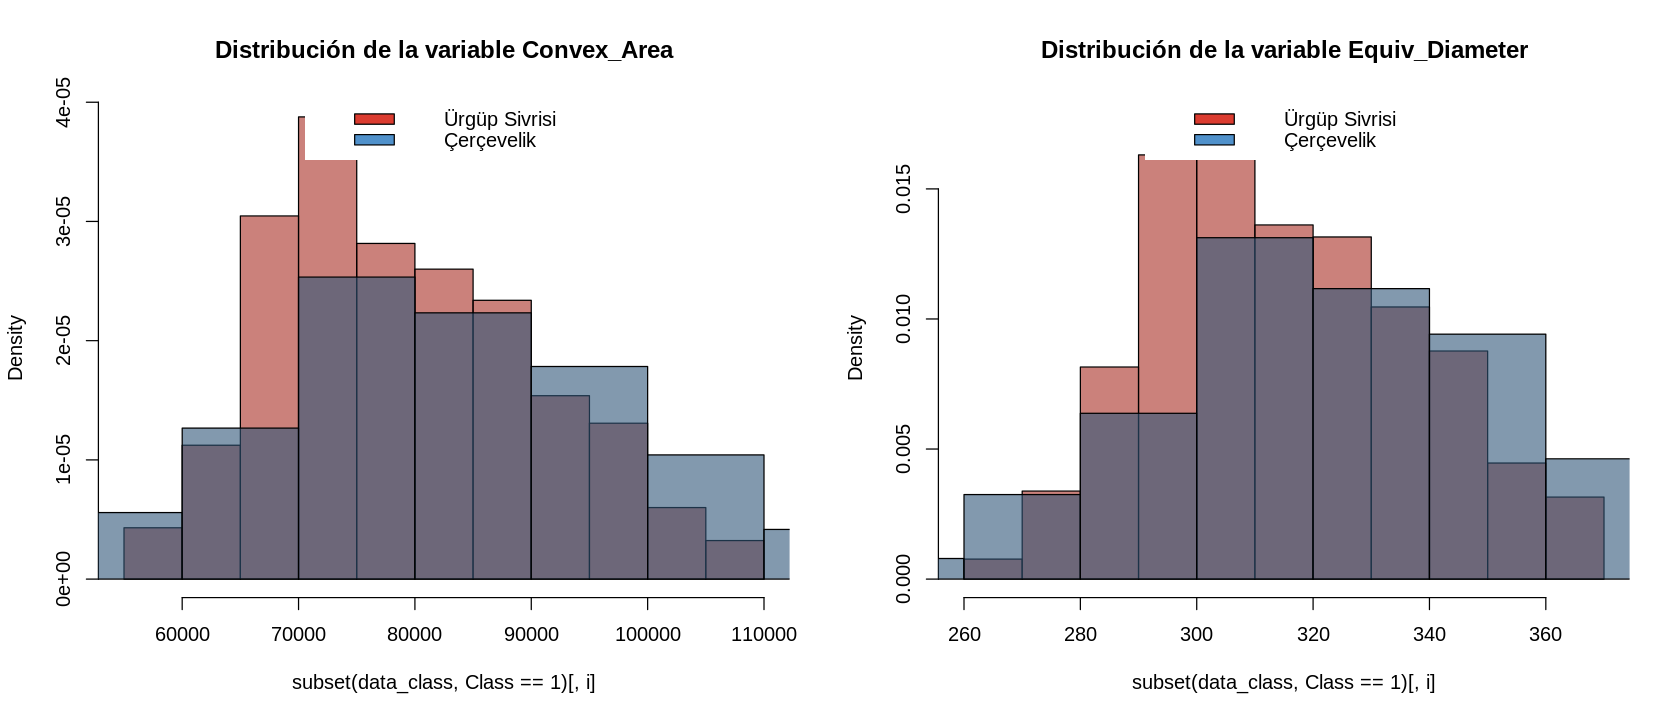

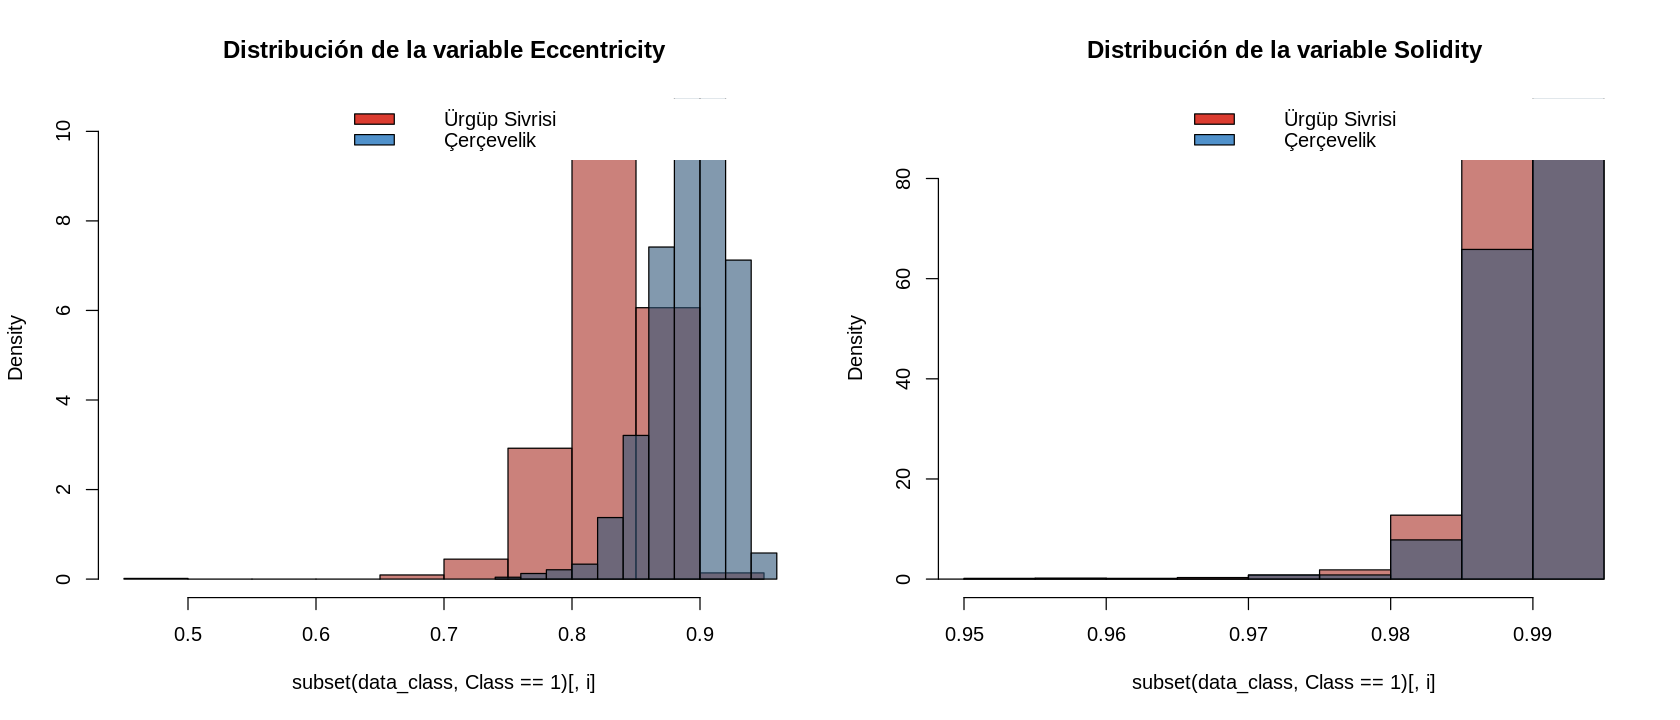

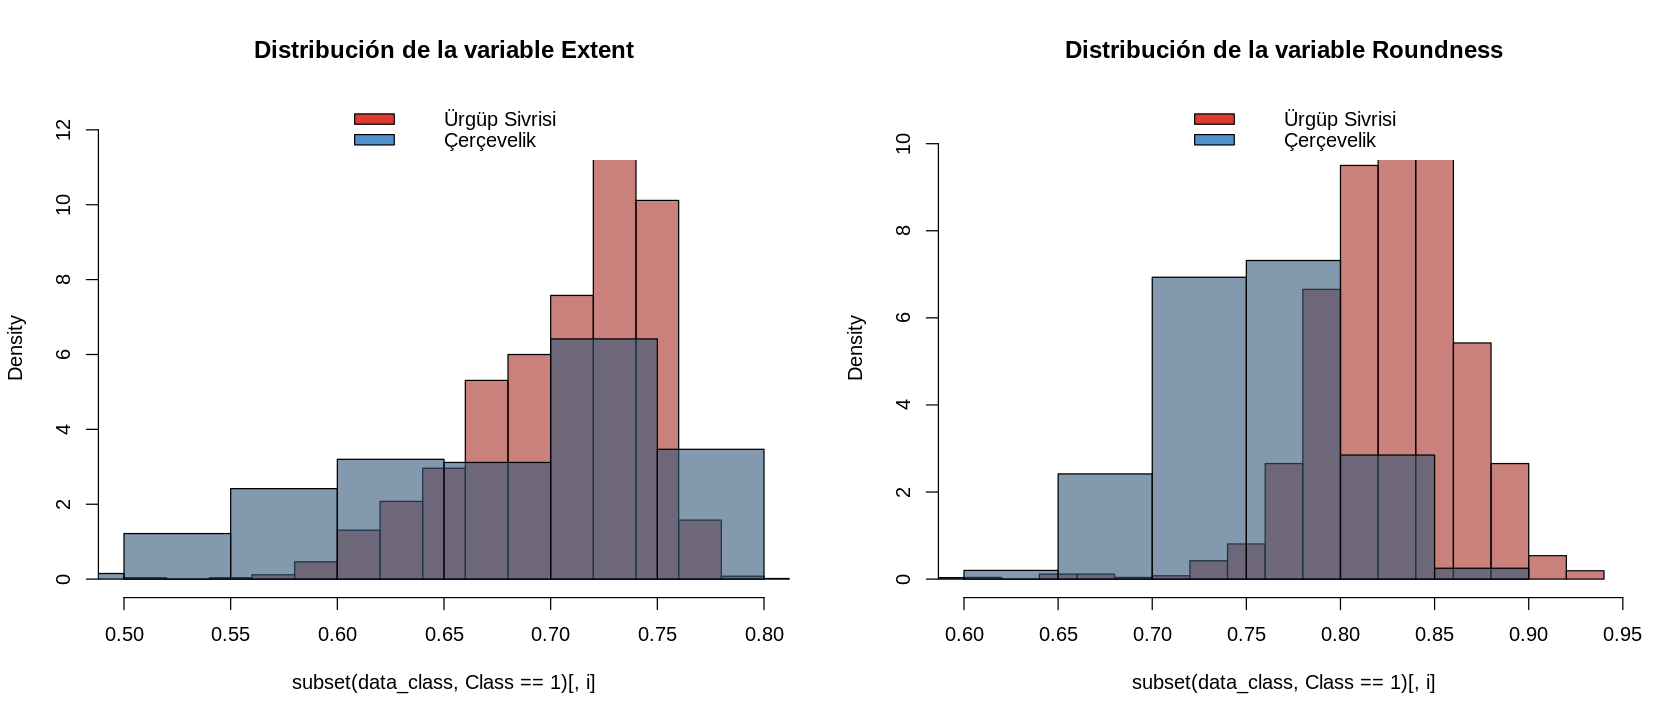

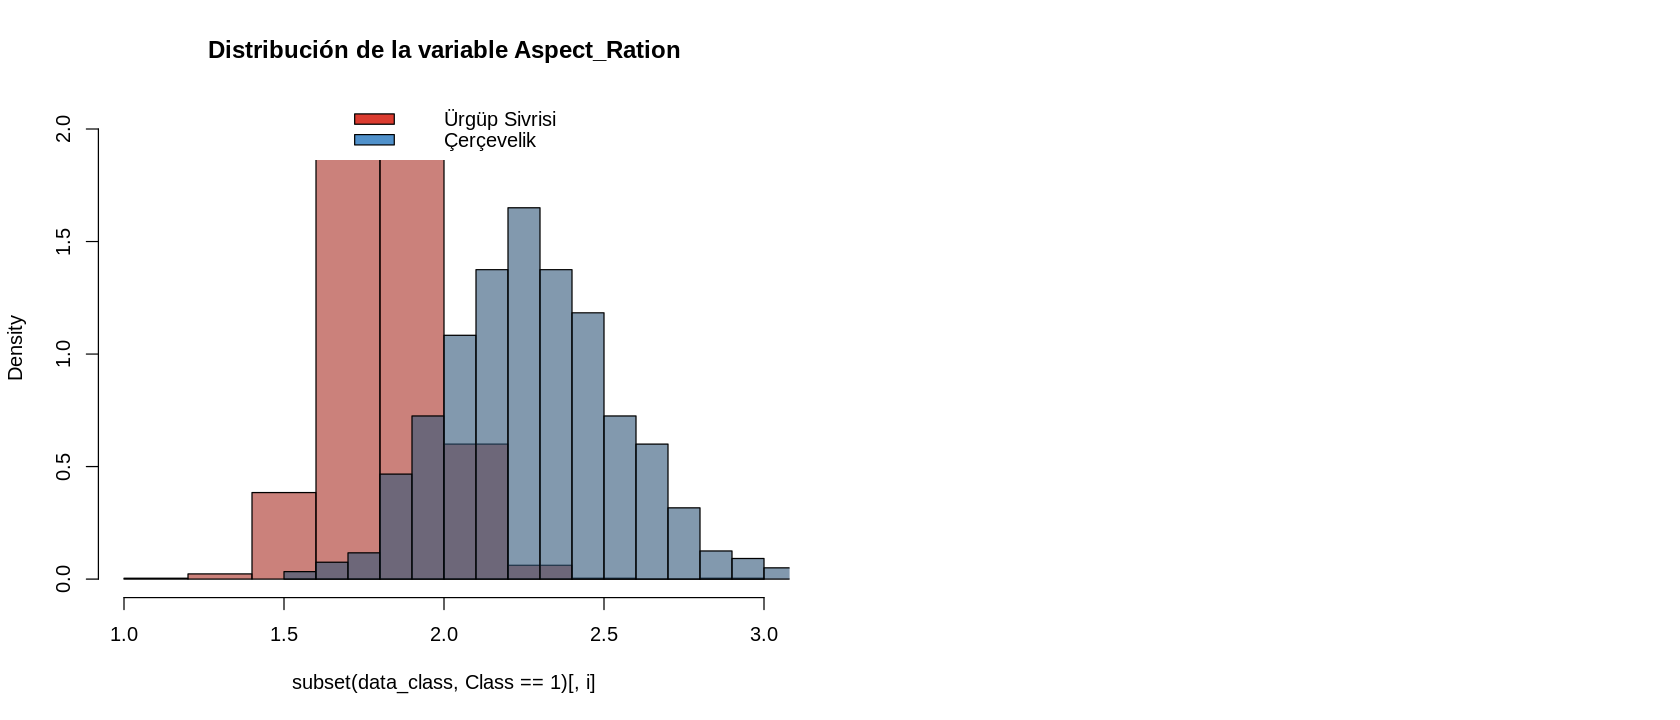

In [16]:
options(
  repr.plot.width = 14,
  repr.plot.height = 6
)

par(mfrow = c(1, 2))
for (i in 1:((length(colnames(data_class)))-2)) {

  hist(subset(data_class, Class == 1)[, i],
       col = rgb(0.66,0.18,0.14,0.6),
       main = paste0("Distribución de la variable ", colnames(data_class)[i]),
       freq = FALSE)
  hist(subset(data_class, Class == 0)[, i],
     col = rgb(0.187,0.339,0.474,0.6),
       add = TRUE,
       freq = FALSE)
  #abline(v = mean(subset(data_class, Class == 1)[, i]), col = '#990000', lwd = 4)
  #abline(v = mean(subset(data_class, Class == 0)[, i]), col = '#0b5394', lwd = 4)
  legend(x = "topright", legend = c('Ürgüp Sivrisi','Çerçevelik'), fill = c('#db3c30', '#5091cb'), box.lty = "blank")
  if (i %% 2 == 0) {par(mfrow = c(1, 2))}
}

Ya que la cantidad de muestras de cada clase no son exactamente iguales, podemos utilizar la densidad para comparar la distribución de cada clase. En general todas las variables tienen una distribución similar, excepto "Eccentricity" y "Aspect_Ration"

## <font color='#3d59c6'>  3. SELECCIÓN DE VARIABLES </font>

### <font color='#3d59c6'>  3.1 Standardisation </font>

Para seleccionar las variables que más tienen relevancia en la construcción del modelo de regresión logística, se hace un análisis inicial de los estadísticos descriptivos de cada variable. Seguido de un análisis de correlación entre las variables. Una vez identificado las variables más relevantes, se procede a hacer un análisis PCA de componentes principales, donde se busca encontrar componentes que capturan la mayor cantidad de varianza en los datos. De allí, sacamos las variables que más relevancia tienen en los componentes más relevantes.
Una vez acotamos la dimensionalidad del conjunto de datos, procedemos a hacer un Análisis de Información mutua de las variables, utilizando la ganancia de información, el ratio de ganancia y la incertidumbre simétrica. aquí vemos la relevancia de las variables con las que queremos hacer el modelo de regresión logística.

En este caso no tenemos variables categóricas, más allá de la variable objetivo. Así que no se realizará un análisis ANOVA.

 El objetivo del modelo de regresión logística es maximizar la clasificación correcta de predicción sobre si la calabaza es del tipo Urgup_Sivrisi (0) o del tipo Cercevelik (1)



Procedemos a la estandarización de los datos, ya que hay variables como el "área" (80658) en la que la media es varios ordenes de magnitud más grande que la media de "Solidity" (0.9895) por poner un ejemplo

In [17]:
# Suponiendo que 'df' es tu conjunto de datos
# Cargamos la biblioteca 'caret' para usar la función de normalización
library(caret)

# Seleccionamos solo las columnas numéricas para normalizar
numeric_cols <- sapply(data, is.numeric)
data_num <- data[, numeric_cols]

# Estandarización (z-score)
data_standardized <- as.data.frame(scale(data_num))

# Concatenamos las columnas no numéricas
data_standardized <- cbind(data[, !numeric_cols], data_standardized)
colnames(data_standardized)[1] <- "Class"


In [18]:
head(data_standardized)

,Class,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Çerçevelik,-1.7843465,-2.2153116,-2.3197601,-0.2384883,-1.7928595,-1.9207900,-2.7293890,0.202771225,0.8552349,1.8733878,-1.77470839,2.1968405
2,Çerçevelik,-0.2947212,-0.5686898,-0.7007762,0.3620162,-0.3071822,-0.2592909,-0.7390153,0.603504871,0.3594511,0.9381892,-0.82469902,0.8400621
3,Çerçevelik,-0.6612180,-0.4328534,-0.3693212,-0.6330887,-0.6426202,-0.6452507,0.3104142,-1.085301208,0.7682265,-0.4315282,0.07404402,-0.2114411
4,Çerçevelik,-1.0392045,-1.2651707,-1.3343487,-0.1400475,-1.0454800,-1.0577278,-1.0755412,0.202771225,0.7616598,1.0204437,-1.03514413,1.0982269
5,Çerçevelik,-1.0648915,-1.2093845,-1.2930138,-0.2292297,-1.0455527,-1.0863311,-0.9338461,-1.285668031,-0.2955745,0.7557986,-0.95064963,0.9719711
6,Çerçevelik,-0.5464682,-0.8129409,-0.9031387,0.2417101,-0.5477357,-0.5229984,-0.8718545,0.002404402,0.3824345,1.0097149,-0.91204165,0.9060166


In [19]:
colnames(data_standardized)

[1] "Class"             "Area"              "Perimeter"        
 [4] "Major_Axis_Length" "Minor_Axis_Length" "Convex_Area"      
 [7] "Equiv_Diameter"    "Eccentricity"      "Solidity"         
[10] "Extent"            "Roundness"         "Aspect_Ration"    
[13] "Compactness"

In [33]:
#To be used later for the ANOVA
data_standardized_nt = data_standardized %>%
  select(-Class)

In [34]:
colnames(data_standardized_nt)

[1] "Area"              "Perimeter"         "Major_Axis_Length"
 [4] "Minor_Axis_Length" "Convex_Area"       "Equiv_Diameter"   
 [7] "Eccentricity"      "Solidity"          "Extent"           
[10] "Roundness"         "Aspect_Ration"     "Compactness"

In [20]:
data_std_class <- data_standardized



# Si la codificación no es "UTF-8", intenta convertirla a UTF-8
data_std_class$Class <- iconv(data_std_class$Class, to = "UTF-8")

# Reemplazar el texto en la columna 'Class' con valores 0 y 1
data_std_class$Class <- ifelse(data_std_class$Class == "Çerçevelik", 1, 0)

Tenemos ahora los datos estandarizados y con la clase a la que pertenecen

### <font color='#3d59c6'>  3.2 Análisis de Correlación </font>

In [21]:
# Calculamos la correlación redondeada
round(cor(data_std_class), 2)

,Class,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
Class,1.00,-0.17,-0.39,-0.56,0.40,-0.17,-0.16,-0.70,-0.12,0.24,0.67,-0.72,0.73
Area,-0.17,1.00,0.93,0.79,0.69,1.00,1.00,0.16,0.16,-0.01,-0.15,0.16,-0.16
Perimeter,-0.39,0.93,1.00,0.95,0.39,0.93,0.93,0.46,0.07,-0.14,-0.50,0.49,-0.48
Major_Axis_Length,-0.56,0.79,0.95,1.00,0.10,0.79,0.79,0.70,0.12,-0.21,-0.68,0.73,-0.73
Minor_Axis_Length,0.40,0.69,0.39,0.10,1.00,0.69,0.69,-0.59,0.09,0.23,0.56,-0.60,0.60
Convex_Area,-0.17,1.00,0.93,0.79,0.69,1.00,1.00,0.16,0.14,-0.02,-0.15,0.16,-0.16
Equiv_Diameter,-0.16,1.00,0.93,0.79,0.69,1.00,1.00,0.16,0.16,-0.01,-0.15,0.16,-0.16
Eccentricity,-0.70,0.16,0.46,0.70,-0.59,0.16,0.16,1.00,0.04,-0.33,-0.89,0.95,-0.98
Solidity,-0.12,0.16,0.07,0.12,0.09,0.14,0.16,0.04,1.00,0.07,0.20,0.03,-0.02
Extent,0.24,-0.01,-0.14,-0.21,0.23,-0.02,-0.01,-0.33,0.07,1.00,0.35,-0.33,0.34


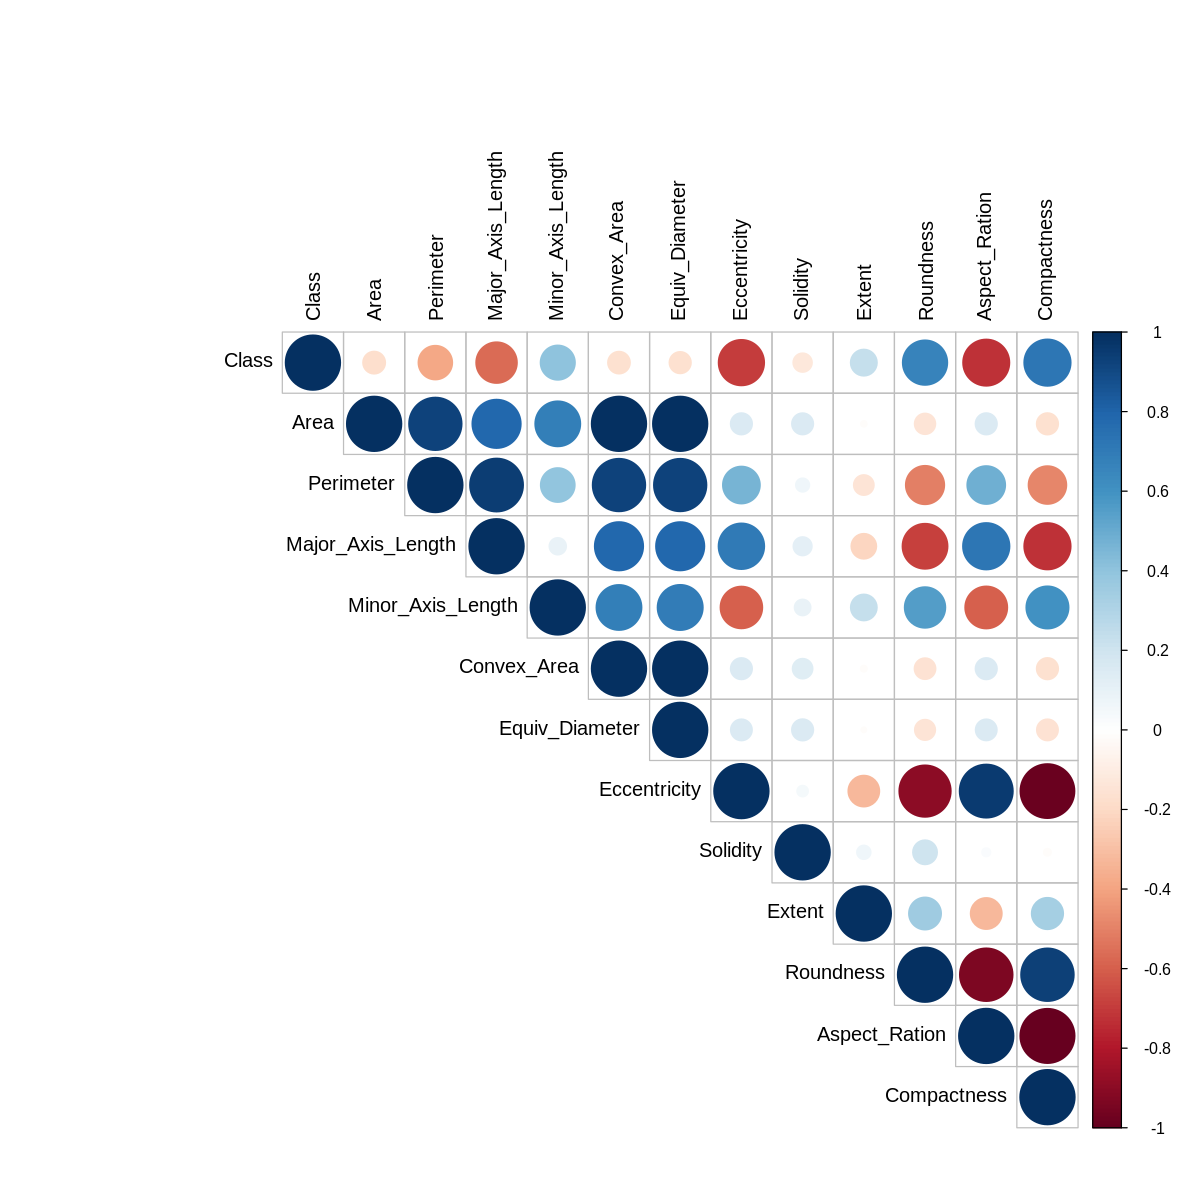

In [22]:
options(repr.plot.width = 10,
  repr.plot.height = 10 )
corrplot::corrplot(cor(data_std_class)
                   , type = "upper"
                   , number.cex = .6
                   , tl.col = "black"
                   , tl.srt = 90)

Observamos que hay una alta correlación de las variables:

*   Compactness (0.73)
*   Aspect_Ration (-0.72)
*   Eccentricity (0.70)
*   Roundness (0.67)
*   Major_Axis_Length (-0.56)
*   Minor_Axis_Length (0.40)
*   Perimeter (0.39)

Por otro lado, las variables Compactness, Aspect_Ration, Eccentricity, Roundness estan altamente correlacionadas entre si.

Y las variables Major_Axis_Length y Perimeter están altamente correlacionadas.


### <font color='#3d59c6'>  3.3 Análisis de PCA </font>

Para hacer el análisis PCA, se tomaron aquellas variables que presentaron una alta correlación con la variable Objetivo. Acotando las variables, se observa de manera mas detallada su influencia en los componentes.

In [23]:
# Crear un nuevo conjunto de datos 'data_pca' a partir de 'data_std_class' incluyendo solo las columnas especificadas
data_pca <- data_std_class %>%
  select(Compactness, Aspect_Ration, Eccentricity, Roundness, Major_Axis_Length, Minor_Axis_Length, Perimeter)


In [24]:
PCA = princomp(data_pca, scores = T)
summary(PCA)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4       Comp.5
Standard deviation     2.2440538 1.3365445 0.35080240 0.21284227 0.0743681367
Proportion of Variance 0.7196847 0.2552952 0.01758737 0.00647428 0.0007904047
Cumulative Proportion  0.7196847 0.9749798 0.99256721 0.99904149 0.9998318970
                             Comp.6       Comp.7
Standard deviation     0.0328445109 9.873612e-03
Proportion of Variance 0.0001541705 1.393246e-05
Cumulative Proportion  0.9999860675 1.000000e+00

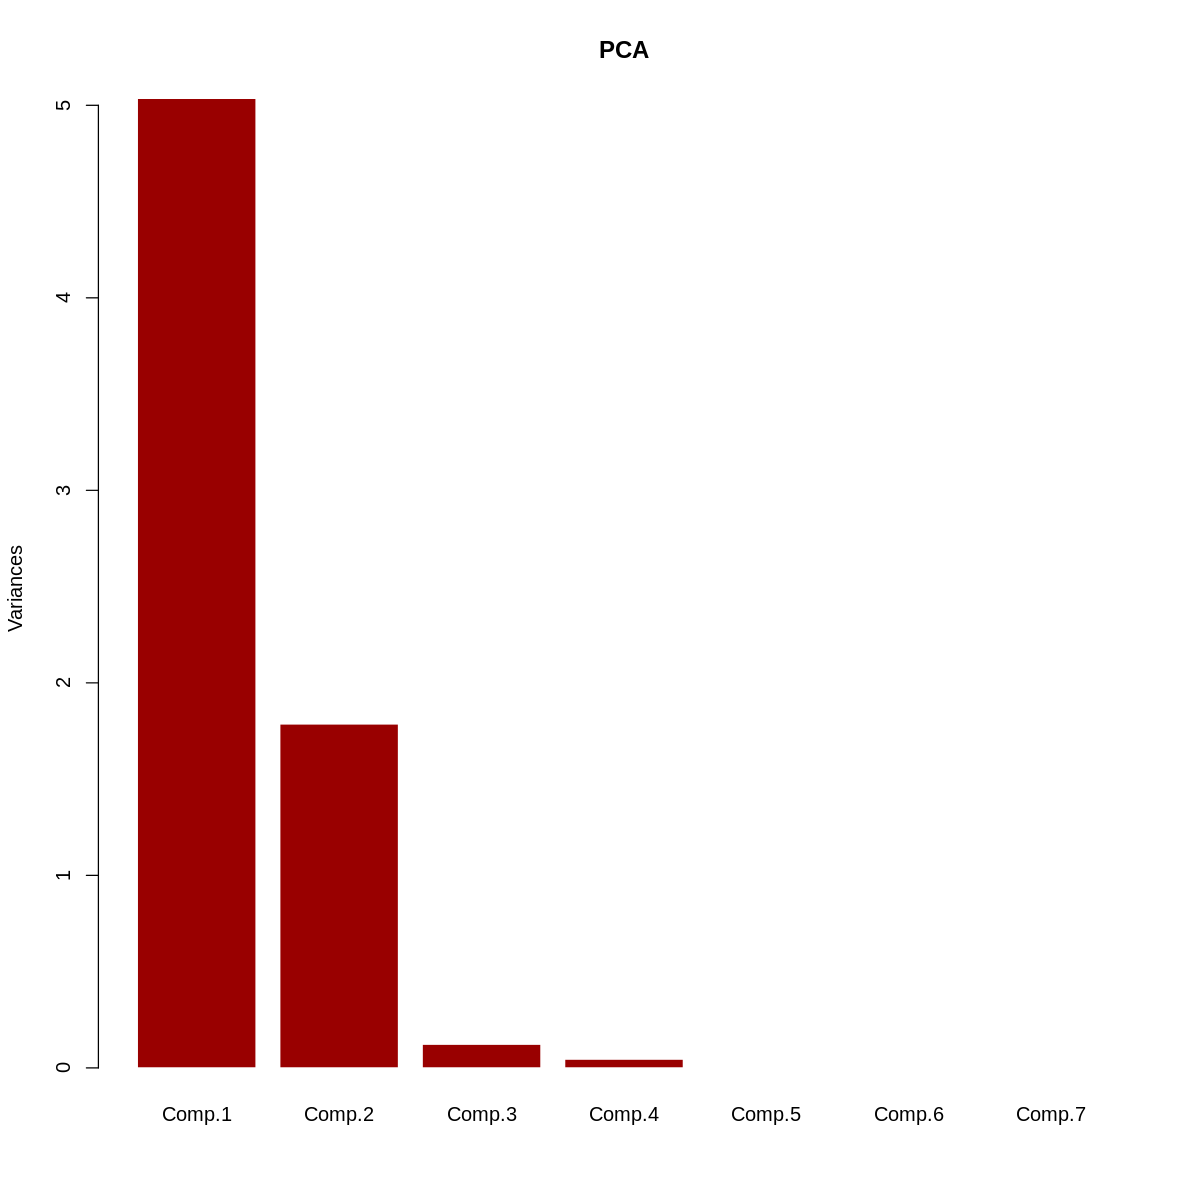

In [25]:
plot(PCA,type="bar",col="#990000", border = FALSE)

In [26]:
print(round(PCA$loadings[, 1:6],3))

                  Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
Compactness        0.440  0.107  0.190  0.053  0.282  0.735
Aspect_Ration     -0.437 -0.102 -0.040 -0.606 -0.434  0.491
Eccentricity      -0.429 -0.110 -0.490  0.667 -0.068  0.314
Roundness          0.423  0.086 -0.818 -0.288  0.082  0.051
Major_Axis_Length -0.363  0.428 -0.191 -0.264  0.407 -0.235
Minor_Axis_Length  0.216  0.652 -0.002  0.173 -0.680 -0.065
Perimeter         -0.271  0.592  0.127  0.052  0.305  0.244


Observamos que la Componente 1 explica un 72% de la varaibilidad de los datos y la componente 2 un 26%.

Dentro de la componente 1 las variables más importantes son Compactness, Aspect_ration y Eccentricity.

De la Componente 2 tenemos Minor_Axis_Length  y perimeter como las más influyentes

### <font color='#3d59c6'>  3.4 Análisis de Información Mutua </font>

Con tal de ver la información mutua entre el target y las covariables se aplican los tres algoritmos detallados a continuación:

- "infogain": ${H(Class)} + H(Attribute) − H(Class, Attribute)$

- "gainratio" : $H(Class) + H(Attribute) − H(Class, Attribute) / H(Attribute) $

- "symuncert" : $2 * (H(Class) + H(Attribute) − H(Class, Attribute)) / (H(Attribute) + H(Class)) $

Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
“Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE.”


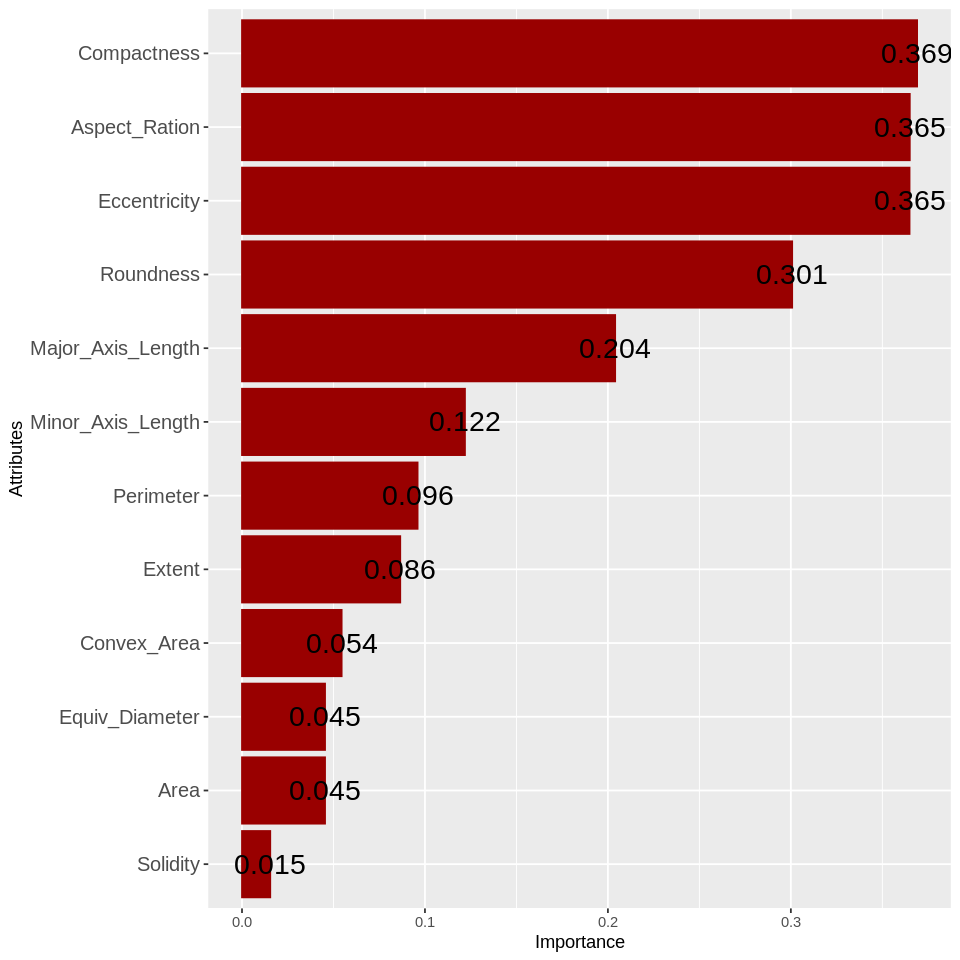

In [27]:
options(repr.plot.width = 8, repr.plot.height = 8 )
ig = information_gain(formula = Class ~ .
                     , data = data_std_class
                     , type = 'infogain')

ggplot(ig, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#990000", color = "#990000") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

Las variable Compactness, Aspect_Ration, Eccentricity, Roundness, Major_Axis_Length, Minor_Axis_Length, Perimeter son aquellas que más reducen la incertidumbre sobre la clase de calabaza

Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
“Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE.”


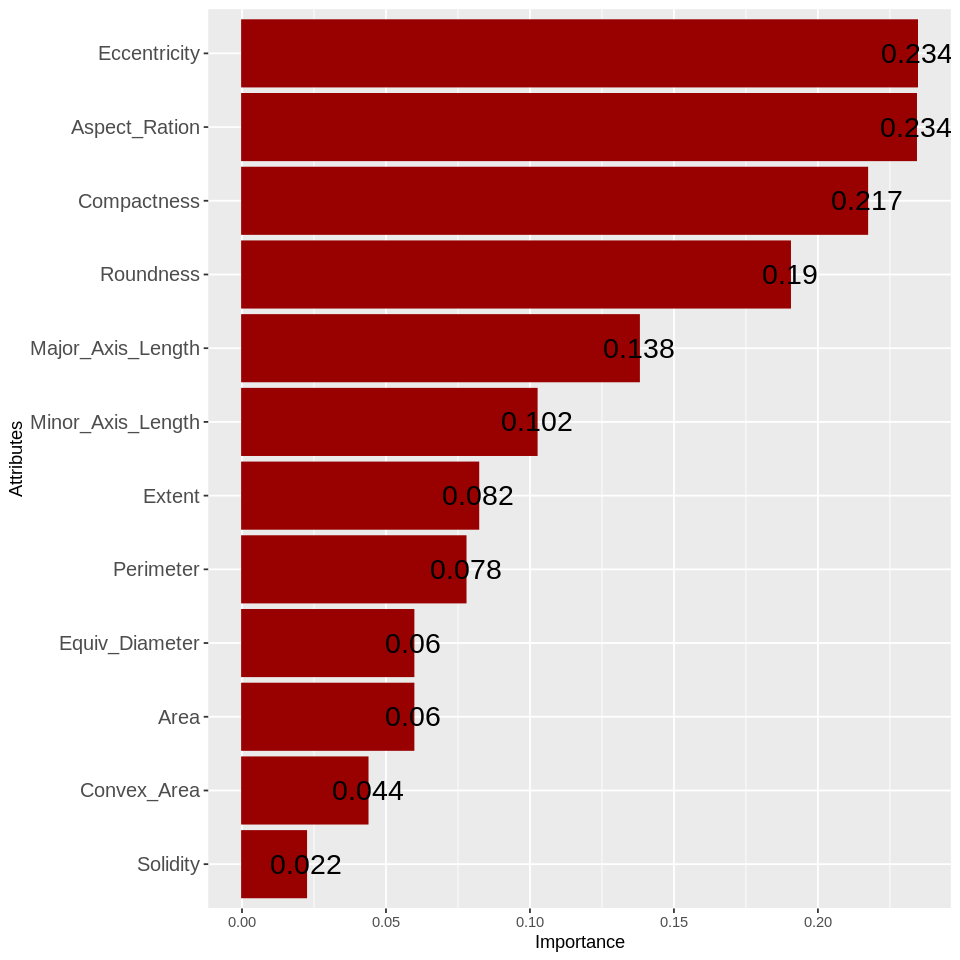

In [28]:
gr = information_gain(formula = Class ~ .
                     , data = data_std_class
                     , type = 'gainratio')

ggplot(gr, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#990000", color = "#990000") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

Para el gainratio, las variables que mas aportan información son Eccentricity, Aspect_Ration, Compactness, Roundness, Major_Axis_Length, Minor_Axis_Length.

Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
“Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE.”


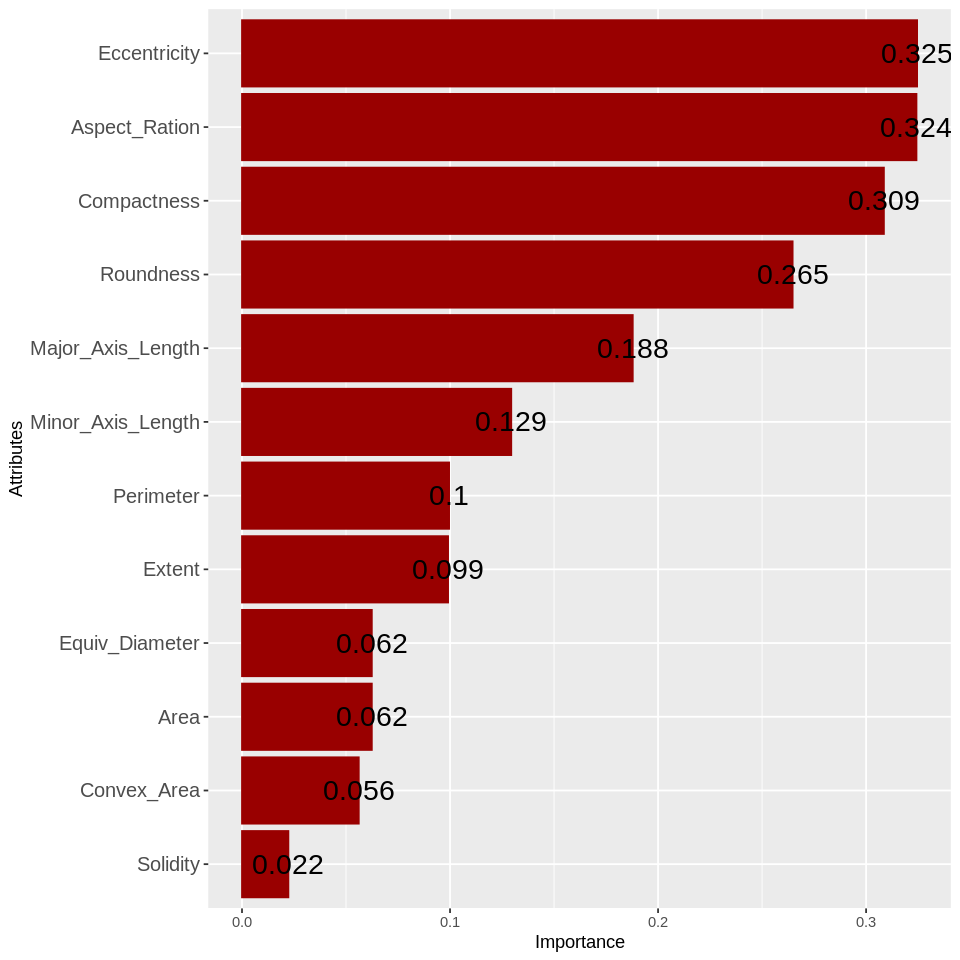

In [29]:
gr = information_gain(formula = Class ~ .
                     , data = data_std_class
                     , type = 'symuncert')

ggplot(gr, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#990000", color = "#990000") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

Para el symuncert, las variables más importantes son Eccentricity, Aspect_Ration, Compactness, Roundness, Major_Axis_Length, Minor_Axis_Length.

### <font color='#3d59c6'>  3.5 ANOVA </font>

- $H_{0}$: No existen diferencias significativas entre las medias de los grupos
- $H_{1}$: Existen diferencian significativas entre las medias de los grupos

            Variable    F_Value      P_Value
1               Area   74.59327 1.013240e-17
2          Perimeter  443.63412 0.000000e+00
3  Major_Axis_Length 1149.96600 0.000000e+00
4  Minor_Axis_Length  479.67998 0.000000e+00
5        Convex_Area   72.57742 2.732434e-17
6     Equiv_Diameter   65.88394 7.425085e-16
7       Eccentricity 2390.90077 0.000000e+00
8           Solidity   38.16649 7.560815e-10
9             Extent  147.43488 0.000000e+00
10         Roundness 2029.40317 0.000000e+00
11     Aspect_Ration 2716.92322 0.000000e+00
12       Compactness 2795.02244 0.000000e+00


Los p values del ANOVA confirman que todas las variables tienen una influencia significativa en la variable de objetivo

In [ ]:
resultados_anova = data.frame(Variable = character(), F_Value = numeric(), P_Value = numeric(), row.names = NULL)
variables = names(data_nba_num_nt)

for (variable in variables) {
  formula = as.formula(paste(variable, '~ TARGET_5Yrs'))
  anova_result = aov(formula, data = data_nba_num)

  # Extraer F value y p-value
  f_value = summary(anova_result)[[1]][['F value']][1]
  p_value = summary(anova_result)[[1]][['Pr(>F)']][1]
 resultados_anova = rbind(resultados_anova, data.frame(Variable = variable, F_Value = f_value, P_Value = p_value))
}

# Muestra los resultados de ANOVA
print(resultados_anova)

## <font color='#3d59c6'>  4. MODELO REGRESIÓN LOGÍSTICA </font>

Luego de hacer el análisis de las variables, observamos que las variables que mayor correlación tienen la variable objetivo son Compactness, Aspect_Ration,  Eccentricity, Roundness, Major_Axis_Length, Minor_Axis_Length y Perimeter. Vimos que estas variables también tienen importancia en los diferentes componentes que tienen una explicabilidad de la varianza de 98%. Donde destaca las variables Compactness, Aspect_Ration,  Eccentricity del Componente 1 y Minor_Axis_Length y Perimeter del Componente 2.

Por último, el análisis de información mutua nos confirma la importancia de las variables  Compactness, Aspect_Ration,  Eccentricity, Roundness, Major_Axis_Length, Minor_Axis_Length.

Luego de hacer estos análisis y observando la correlación entre variables, se ha decidido utilizar las siguientes variables para el modelo de regresión logística:

*   Compactness, altamente correlacionada con eccentricity, roundness y sapect ratio
*   Aspect_Ration puntúa alto en correlación, PCA y IM
*   Major_Axis_Length tiene influencia en correlación y en menor medida en IF
*   Minor_Axis_Length tiene alta influencia en Componente 2 y tiene poca correlación con el resto de las variables.



In [49]:
data_std_subset = subset(data_std_class, select = c(Class, Compactness, Aspect_Ration, Major_Axis_Length, Minor_Axis_Length))

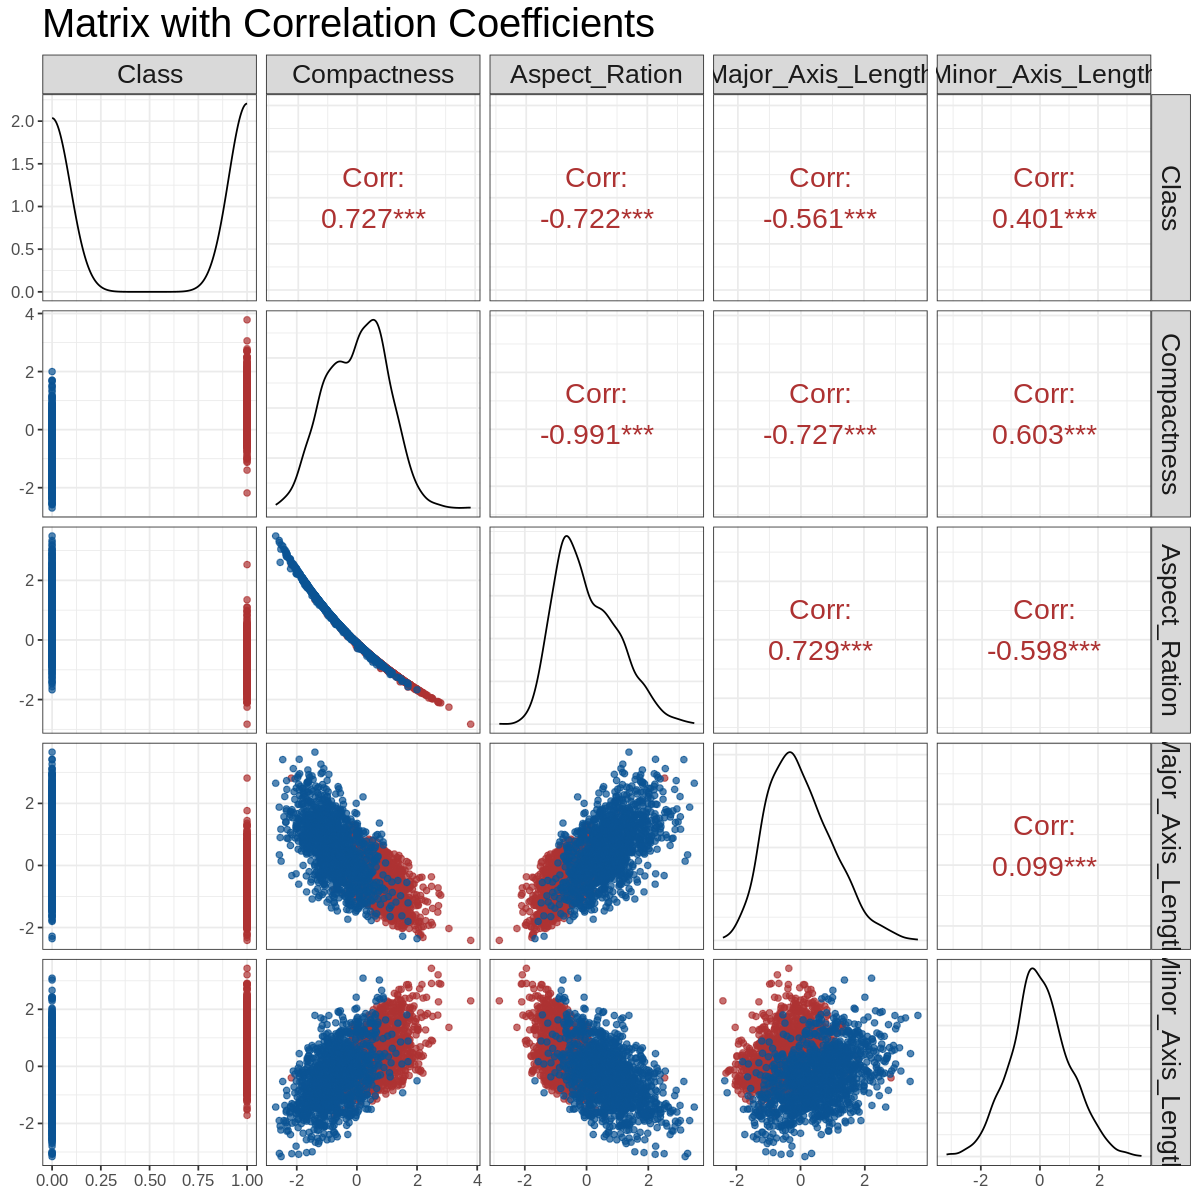

In [50]:
options(repr.plot.width = 10,  repr.plot.height = 10  )

data_1_s = sum(data_std_subset$Class == 1)
data_0_s = sum(data_std_subset$Class == 0)
colores = c(rep('#ad3232',data_1_s), rep('#0b5394',data_0_s))

ggpairs(
  data_std_subset,
  title = "Matrix with Correlation Coefficients",
  lower = list(continuous = wrap("points", alpha = 0.7, color = colores)),
  upper = list(continuous = wrap("cor", size = 6, color ='#ad3232'))) +
theme_bw() +
theme(
  text = element_text(size = 20),
  axis.text = element_text(size = 10),
  axis.title = element_text(size = 10)
)

Las variables "Compactness" y "Aspect_Ration" tienen una correlación de 0.991. Ambos aportan valores similares a la componente 1 del PCA. Sin embargo, a pesar de que Compactness tiene mayor correlación con la variable objetivo, se ha decidido utilizar Aspect_ration para el modelo. Esto es debido a que aporta más información en el análisis de entropía.

### <font color='#3d59c6'>  4.1 Fase Train </font>

In [51]:
set.seed(5)
inTrain = createDataPartition(y = data_std_class$Class
                                  , p = .80
                                  , list = FALSE
                                  , times = 1)
data_std_class.train = data_std_class[inTrain,]
data_std_class.test = data_std_class[-inTrain,]

ytrain = data_std_class$Class[inTrain]
ytest = data_std_class$Class[-inTrain]

In [47]:
### Generamos un primer modelo con las variables consideradas importantes por los diferentes análisis
mrl1 = glm(formula = Class ~ Aspect_Ration + Major_Axis_Length + Minor_Axis_Length
          , data = data_std_class.train
          , family = "binomial")
summary(mrl1)


Call:
glm(formula = Class ~ Aspect_Ration + Major_Axis_Length + Minor_Axis_Length, 
    family = "binomial", data = data_std_class.train)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.32683    0.09741  -3.355 0.000793 ***
Aspect_Ration     -6.77305    1.41899  -4.773 1.81e-06 ***
Major_Axis_Length  2.55158    1.08660   2.348 0.018863 *  
Minor_Axis_Length -2.44023    0.89404  -2.729 0.006344 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2769.7  on 1999  degrees of freedom
Residual deviance: 1272.4  on 1996  degrees of freedom
AIC: 1280.4

Number of Fisher Scoring iterations: 6


En un primer análisis se observa que el p value para Major_Axis_Length (0.0189) es mayor a 0.05. Asi que se hace otro análisis sin esta variable

In [52]:
### Generamos un primer modelo con las variables consideradas importantes por los diferentes análisis
mrl2 = glm(formula = Class ~ Aspect_Ration + Minor_Axis_Length
          , data = data_std_class.train
          , family = "binomial")
summary(mrl2)


Call:
glm(formula = Class ~ Aspect_Ration + Minor_Axis_Length, family = "binomial", 
    data = data_std_class.train)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.18723    0.07403  -2.529  0.01144 *  
Aspect_Ration     -3.50083    0.16287 -21.495  < 2e-16 ***
Minor_Axis_Length -0.34318    0.09162  -3.746  0.00018 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2769.7  on 1999  degrees of freedom
Residual deviance: 1277.8  on 1997  degrees of freedom
AIC: 1283.8

Number of Fisher Scoring iterations: 6


In [56]:
### Generamos las predicciones de nuestro modelo
mrl2_prob = predict(mrl2, type = 'response')
 head(mrl2_prob)

1         3         4         5         6         7 
0.9977790 0.4429553 0.9702494 0.9615618 0.9489587 0.9824947

Observamos la probabilidad de teniendo un valor pertenezca a una clase o otra

In [57]:
### Vemos la predicción para cada instancia
mrl2_pred = ifelse(mrl2_prob > 0.5, 1, 0)
head(mrl2_pred)

1 3 4 5 6 7 
1 0 1 1 1 1

Utilizamos el valor 0.5 para separar que sea de una clase o de otra

In [58]:
confusionMatrix(as.factor(mrl2_pred), as.factor(data_std_class.train$Class))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 810 106
         1 152 932
                                          
               Accuracy : 0.871           
                 95% CI : (0.8555, 0.8854)
    No Information Rate : 0.519           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7412          
                                          
 Mcnemar's Test P-Value : 0.005085        
                                          
            Sensitivity : 0.8420          
            Specificity : 0.8979          
         Pos Pred Value : 0.8843          
         Neg Pred Value : 0.8598          
             Prevalence : 0.4810          
         Detection Rate : 0.4050          
   Detection Prevalence : 0.4580          
      Balanced Accuracy : 0.8699          
                                          
       'Positive' Class : 0               
                              

La matriz de confusión nos muestra que hay un muy buen accuracy de 87.1%.
Hay 106 "falsos positivos" donde el modelo predijo incorrectamente la clase "Cercevelik" (1) cuando la verdadera clase era "Urgup_Sivrisi" (0).

Hay 152 falsos negativos en este caso donde el modelo predijo incorrectamente la clase "Urgup_Sivrisi" (0) cuando la verdadera clase era "Cercevelik" (1).




### <font color='#3d59c6'>  4.2 Fasa Test </font>

In [59]:
pred_mrl2= predict(mrl2,newdata = data_std_class.test, type="response")
mrl2_pred = ifelse(pred_mrl2 > 0.5, 1, 0)
confusionMatrix(as.factor(mrl2_pred), as.factor(data_std_class.test$Class))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 198  29
         1  40 233
                                         
               Accuracy : 0.862          
                 95% CI : (0.8286, 0.891)
    No Information Rate : 0.524          
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.7228         
                                         
 Mcnemar's Test P-Value : 0.2286         
                                         
            Sensitivity : 0.8319         
            Specificity : 0.8893         
         Pos Pred Value : 0.8722         
         Neg Pred Value : 0.8535         
             Prevalence : 0.4760         
         Detection Rate : 0.3960         
   Detection Prevalence : 0.4540         
      Balanced Accuracy : 0.8606         
                                         
       'Positive' Class : 0              
                                         

Con los datos que no ha visto el modelo, sigue teniendo un buen accuracy de 86.2%. Con 29 de 198 falsos positivos y 40 de 233 falsos negativos.
Con una Sensibilidad de 83.2% y una Especifidad de 88.9%



## <font color='#3d59c6'>  CONCLUSIONES </font>


El histograma y los estadísticos descriptivos muestran que en general todas las variables tienen una distribución gaussiana. Donde la media y la mediana tienen valores similares. A observar 2 variables (Solidity, Eccentricity) donde los datos tienden a acumularse en los últimos cuartiles.

Para nuestro análisis la clasificación "Çerçevelik" es identificada como Class [0] y "Ürgüp Sivrisi" como Class [1]. Se observa que el dataset tiene los datos de las clasificaciones relativamente balanceadas. 52% y 48% respectivamente.

Ya que la cantidad de muestras de cada clase no son exactamente iguales, podemos utilizar la densidad para comparar la distribución de cada clase. En general todas las variables tienen una distribución similar, excepto "Eccentricity" y "Aspect_Ration".

Procedemos a la estandarización de los datos, ya que hay variables como el "área" (80658) en la que la media es varios ordenes de magnitud más grande que la media de "Solidity" (0.9895) por poner un ejemplo

Para seleccionar las variables que más tienen relevancia en la construcción del modelo de regresión logística, se hace un análisis inicial de los estadísticos descriptivos de cada variable. Seguido de un análisis de correlación entre las variables. Una vez identificado las variables más relevantes, se procede a hacer un análisis PCA de componentes principales, donde se busca encontrar componentes que capturan la mayor cantidad de varianza en los datos. De allí, sacamos las variables que más relevancia tienen en los componentes más relevantes.
Una vez acotamos la dimensionalidad del conjunto de datos, procedemos a hacer un Análisis de Información mutua de las variables, utilizando la ganancia de información, el ratio de ganancia y la incertidumbre simétrica. aquí vemos la relevancia de las variables con las que queremos hacer el modelo de regresión logística.

Los p values del ANOVA confirman que todas las variables tienen una influencia significativa en la variable de objetivo

 El objetivo del modelo de regresión logística es maximizar la clasificación correcta de predicción sobre si la calabaza es del tipo Urgup_Sivrisi (0) o del tipo Cercevelik (1)

 Observamos que hay una alta correlación de las variables:

*   Compactness (0.73)
*   Aspect_Ration (-0.72)
*   Eccentricity (0.70)
*   Roundness (0.67)
*   Major_Axis_Length (-0.56)
*   Minor_Axis_Length (0.40)
*   Perimeter (0.39)

Por otro lado, las variables Compactness, Aspect_Ration, Eccentricity, Roundness estan altamente correlacionadas entre si.

Y las variables Major_Axis_Length y Perimeter están altamente correlacionadas.

Para hacer el análisis PCA, se tomaron aquellas variables que presentaron una alta correlación con la variable Objetivo. Acotando las variables, se observa de manera mas detallada su influencia en los componentes. Observamos que la Componente 1 explica un 72% de la varaibilidad de los datos y la componente 2 un 26%.

Dentro de la Componente 1 las variables más importantes son Compactness, Aspect_ration y Eccentricity.

De la Componente 2 tenemos Minor_Axis_Length  y perimeter como las más influyentes .

En el análisis de información mutua, observamos que las siguientes variables son las más relevantes: Eccentricity, Aspect_Ration, Compactness, Roundness, Major_Axis_Length, Minor_Axis_Length.


Luego de hacer estos análisis y observando la correlación entre variables, se ha decidido utilizar las siguientes variables para el modelo de regresión logística:

*   Compactness, altamente correlacionada con eccentricity, roundness y sapect ratio
*   Aspect_Ration puntúa alto en correlación, PCA y IM
*   Major_Axis_Length tiene influencia en correlación y en menor medida en IF
*   Minor_Axis_Length tiene alta influencia en Componente 2 y tiene poca correlación con el resto de las variables.

Las variables "Compactness" y "Aspect_Ration" tienen una correlación de 0.991. Ambos aportan valores similares a la componente 1 del PCA. Sin embargo, a pesar de que Compactness tiene mayor correlación con la variable objetivo, se ha decidido utilizar Aspect_ration para el modelo. Esto es debido a que aporta más información en el análisis de entropía.

Una vez realizada la prueba de regresión logística, obtenemos una matriz de confusión nos muestra que hay un muy buen accuracy de 87.1%.
Hay 106 "falsos positivos" donde el modelo predijo incorrectamente la clase "Cercevelik" (1) cuando la verdadera clase era "Urgup_Sivrisi" (0).

Hay 152 falsos negativos en este caso donde el modelo predijo incorrectamente la clase "Urgup_Sivrisi" (0) cuando la verdadera clase era "Cercevelik" (1).

Con los datos que no ha visto el modelo, sigue teniendo un buen accuracy de 86.2%. Con 29 de 198 falsos positivos y 40 de 233 falsos negativos.
Con una Sensibilidad de 83.2% y una Especifidad de 88.9%



En resumen, el modelo tiene una precisión alta y una buena capacidad para distinguir entre las dos clases específicas de calabaza

Para mejorar el modelo se podría identificar cuales son las observaciones que causan los falsos positivos/negativos y determinar si alguna variable puede dar mayor representación a esos datos, tratar de realizar la regresión logística incluyendo esa nueva variable y determinar así, si hay una mejora del modelo de regresión logística.




